# Integrated Gradient Saliency Card Example
[Saliency Cards: A Framework to Characterize and Compare
Saliency Methods](https://arxiv.org/abs/2206.02958) recommends each saliency card contains a visual example of the saliency method. 

In this notebook, we generate the visual example for [integrated gradients](https://arxiv.org/abs/1703.01365).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from interpretability_methods.integrated_gradients import IntegratedGradients
from interpretability_methods.util import visualize_saliency

### Load Image and ResNet50 ImageNet Model
For the example, we apply integrated gradients to an ImageNet image of a `cab` and a pretrained ImageNet model.

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.__dict__['resnet50'](pretrained=True)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model = model.to(device).eval()

In [4]:
with PIL.Image.open('cab.jpeg') as image:
    image = image.convert('RGB')

In [5]:
def imagenet_transform(normalize=True):
    """Return the ImageNet transform. If normalize, normalize transformation is included."""
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    if normalize is True:
        transform = transforms.Compose([
            transform, 
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
    return transform

transform = imagenet_transform(normalize=True)
display_transform = imagenet_transform(normalize=False)

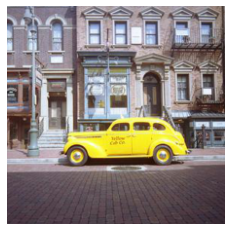

In [6]:
image_input = transform(image)
plt.imshow(display_transform(image).numpy().transpose(1, 2, 0))
plt.axis('off');

## Compute the Model's Prediction
Next, we compute the model's prediction. We will compute saliency towards the predicted class.

In [7]:
input_batch = image_input.unsqueeze(0).to(device)
output = model(input_batch)
predictions = np.argmax(output.cpu().detach().numpy(), axis=1)
print(f'Prediction: {predictions[0]}') # 468 is 'cab'

Prediction: 468


### Compute Integrated Gradients
We compute and display the integrated gradients of the `cab` image towards the predicted class: `cab`.

In [8]:
integrated_gradients = IntegratedGradients(model)

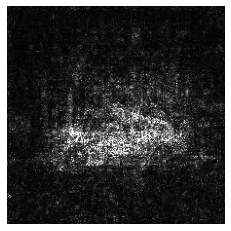

In [9]:
masks = integrated_gradients.get_saliency(input_batch)
visualize_saliency(masks);